# Przetwarzanie sygnałów

## Zadanie 1

#### a) Przeanalizuj poniższy skrypt

<StemContainer object of 3 artists>

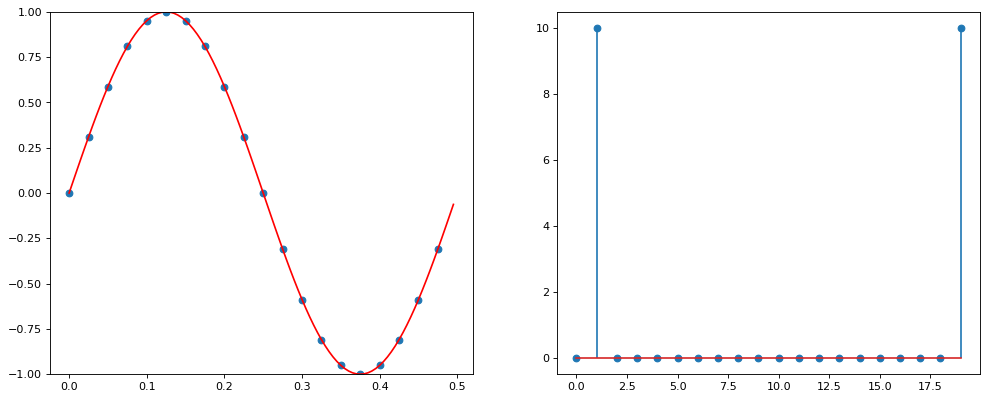

In [1]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

#--- Definiujemy sygnal wejsciowy
A = 1        # Amplituda sygnalu
F = 2.0      # Czestotliwosc sygnalu [Hz]
T = 1/F      # Okres sygnalu [s]
f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

#--- Probkujemy sygnal
LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
w = 40       # Częstotliwość probkowania [Hz]
TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
n = len(t)                 # Liczba próbek

signal = f(t)   

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, signal, 'o')

#--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
base_t = np.arange(0, LP * T, 1/200)
base_signal = f(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])

#--- Wykonujemy FFT - fast fourier transform czy cos takiego
signal1 = fft.fft(signal)
signal1 = abs(signal1) # moduł

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
#ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

freqs = range(n)
stem(freqs, signal1, '-*')

**UWAGA**: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [2]:
def prosta(a=2, b=0):
    x = np.linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)

interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

In [3]:
def plot_fft(w=40, F=2.0, LP=1, A=1):
    #--- Definiujemy sygnal wejsciowy
    #A = 1        # Amplituda sygnalu
    #F = 2.0      # Czestotliwosc sygnalu [Hz]
    T = 1/F      # Okres sygnalu [s]
    f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    #--- Probkujemy sygnal
    #LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
    #w = 40       # Częstotliwość probkowania [Hz]
    TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek

    signal = f(t)   

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    #ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

    
    #mojeee---------------------
    #--- Przygotowujemy oś OX spektrum w Hz
    '''freqs = fft.fftfreq(n, TW)
    #freqs = fft.fftshift(freqs)
    ax.set_xlim([0.0, max(freqs)])'''
    #mojeee---------------------


    freqs = range(n)
    stem(freqs, signal1, '-*')
    #plt.show()
interact(plot_fft, w=(0,100,1), F=(0,10,0.5), LP=(0,10,0.5), A=(-3,3,0.5))

interactive(children=(IntSlider(value=40, description='w'), FloatSlider(value=2.0, description='F', max=10.0, …

<function __main__.plot_fft(w=40, F=2.0, LP=1, A=1)>

#### b) Zmień częstotliwość próbkowania na 50Hz.

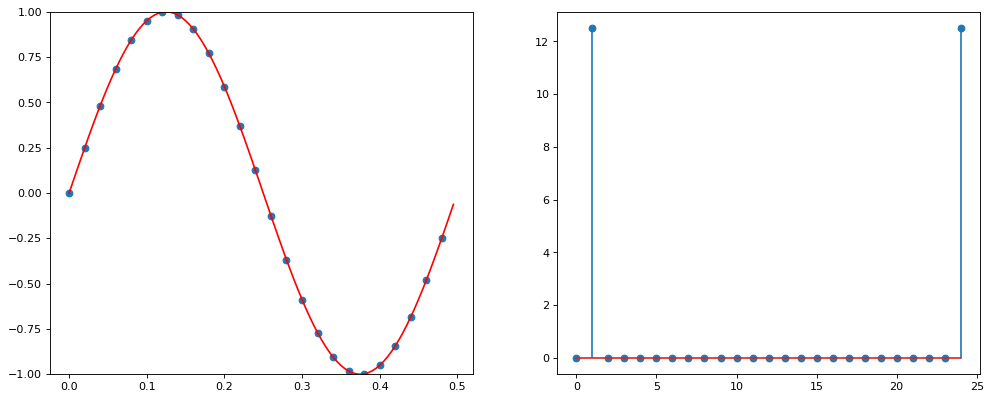

In [4]:
plot_fft(w=50)

#### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [5]:
# chyba git
def plot_fft(w=50, F=2.0, LP=1, A=1):
    #--- Definiujemy sygnal wejsciowy
    #A = 1        # Amplituda sygnalu
    #F = 2.0      # Czestotliwosc sygnalu [Hz]
    T = 1/F      # Okres sygnalu [s]
    f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    #--- Probkujemy sygnal
    #LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
    #w = 40       # Częstotliwość probkowania [Hz]
    TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek

    signal = f(t)   

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    #chat-----------------------------------------------------------
    #--- Wykonujemy FFT - fast fourier transform czy cos takiego
    '''signal1 = fft.fft(signal)
    signal1 = abs(signal1)  # moduł

    #--- Przygotowujemy oś OX spektrum w Hz
    freqs = fft.fftfreq(n, TW)
    freqs = fft.fftshift(freqs)

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.set_xlim([min(freqs), max(freqs)])
    #ax.set_ylim([0.0, max(1.1*ymax, 3.0)])
    # Używamy stem, aby przedstawić spektrum
    stem(freqs, signal1, '-*')
    #chat-----------------------------------------------------------

    '''#--- Wykonujemy FFT - fast fourier transform czy cos takiego
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    #ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

    freqs = [x/(n*TW) for x in range(n)] # to nie śmigando !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    stem(freqs, signal1, '-*')
    #plt.show()
interact(plot_fft, w=(0,100,1), F=(0,10,0.5), LP=(0,10,0.5), A=(-3,3,0.5))

interactive(children=(IntSlider(value=50, description='w'), FloatSlider(value=2.0, description='F', max=10.0, …

<function __main__.plot_fft(w=50, F=2.0, LP=1, A=1)>

#### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [6]:
# chyba git
def plot_fft(w=50, F=2.0, LP=1, A=1):
    #--- Definiujemy sygnal wejsciowy
    #A = 1        # Amplituda sygnalu
    #F = 2.0      # Czestotliwosc sygnalu [Hz]
    T = 1/F      # Okres sygnalu [s]
    f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    #--- Probkujemy sygnal
    #LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
    #w = 40       # Częstotliwość probkowania [Hz]
    TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek

    signal = f(t)   

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    #dodawanie tytułow osi
    plt.setp(ax, xlabel= 'Czas [s]')
    plt.setp(ax, ylabel= 'Amplituda [jednostka amplitudy]')

    #--- Wykonujemy FFT - fast fourier transform czy cos takiego
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    #ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

    freqs = [x/(n*TW) for x in range(n)]
    stem(freqs, signal1, '-*')
    plt.setp(ax, xlabel= 'Częstotliwość [Hz]')
    plt.setp(ax, ylabel= 'Amplituda składowych częstotliwości [jednostka amplitudy]')
    #plt.show()
interact(plot_fft, w=(0,100,1), F=(0,10,0.5), LP=(0,10,0.5), A=(-3,3,0.5))

interactive(children=(IntSlider(value=50, description='w'), FloatSlider(value=2.0, description='F', max=10.0, …

<function __main__.plot_fft(w=50, F=2.0, LP=1, A=1)>

#### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. <font color='red'>Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy</font>? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. <font color='red'>Dlaczego uzyskano taki wynik</font>?

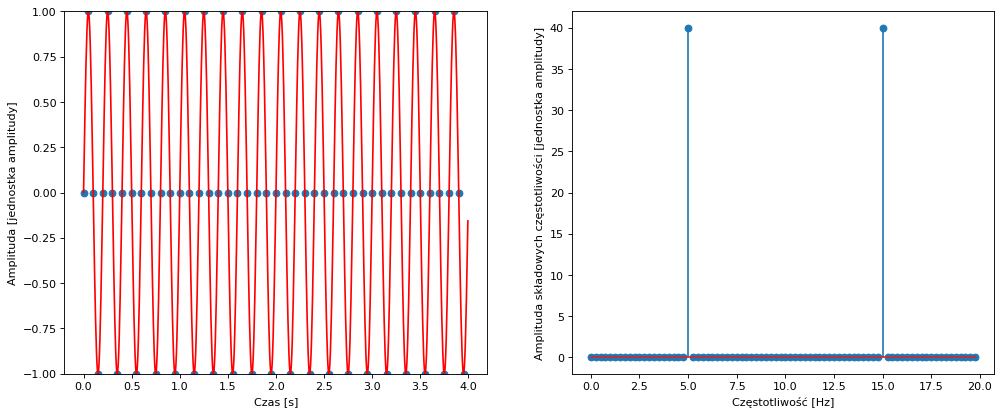

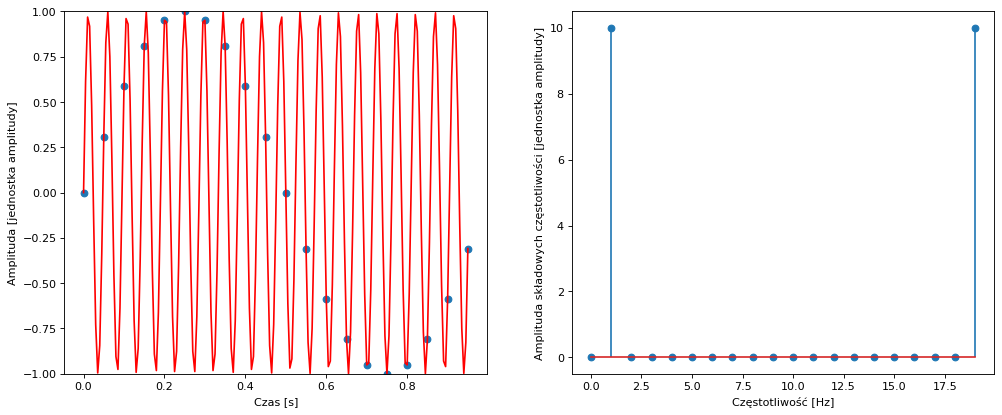

In [7]:
plot_fft(F=5,w=20,LP=20)
plot_fft(F=21,w=20,LP=20)


Uzyskana czestotliwosc FFT to 1 Hz. Uzyskano takie winiki ponieważ parametry funkcji zostały specjalnie dobrane w taki sposob ze w pierwszym przypadku czestostliwosc probkowania jest wielokrotnoscią czestotliwości a w drugim tak że czestotliwość jest większa niż czestotliwość próbkowania.

#### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. <font color='red'>Jak zmienia się wartość na osi OY na wykresie spektrum</font>?

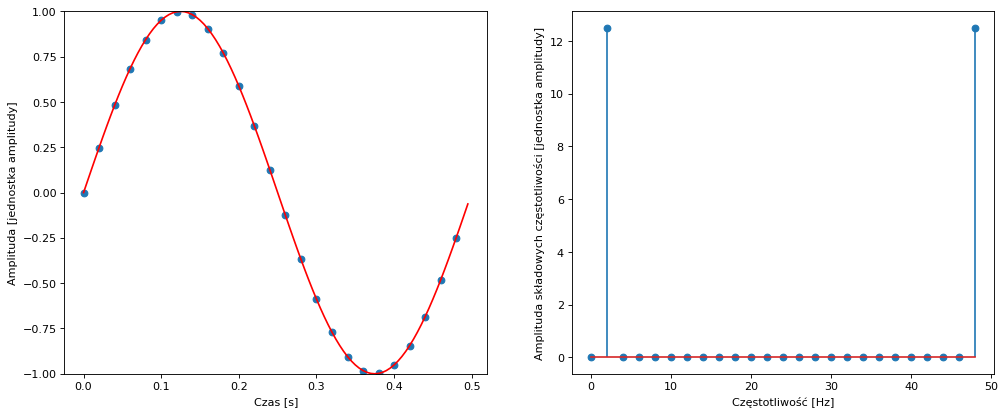

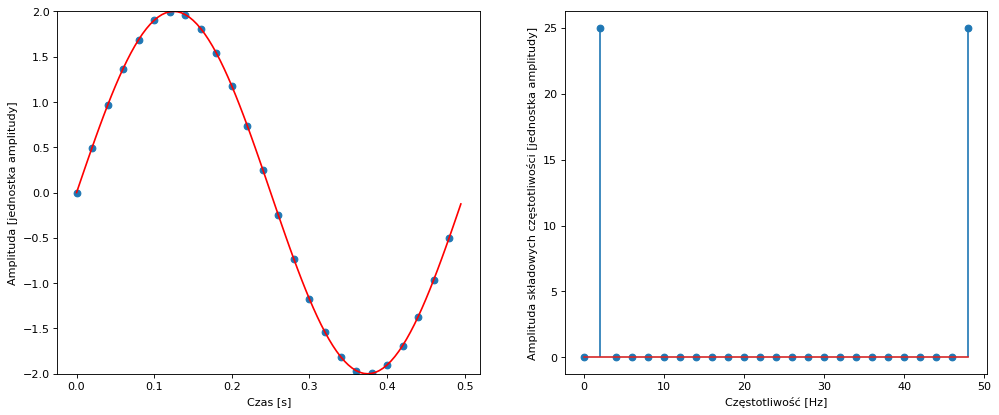

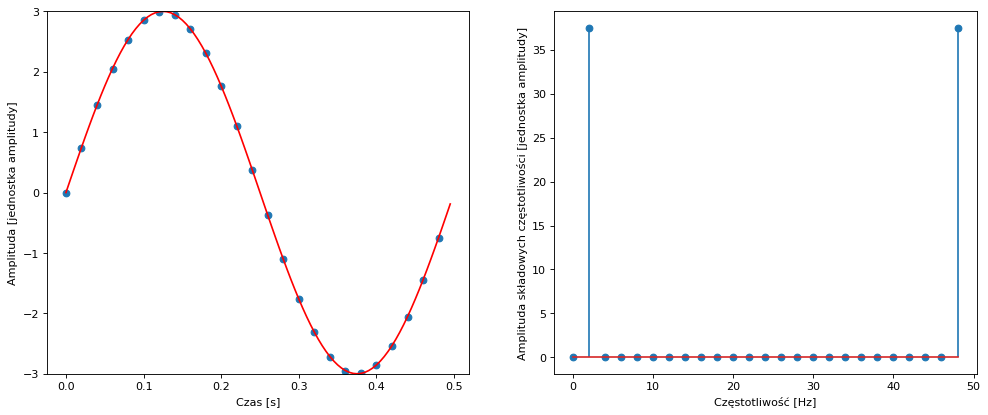

In [8]:
plot_fft(A=1)
plot_fft(A=2)
plot_fft(A=3)

Wartości na osi OY zwiekszają się zgodnie ze skalowaniem amplitudy - max na osi OY to maksymalna wartość amplitudy


#### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

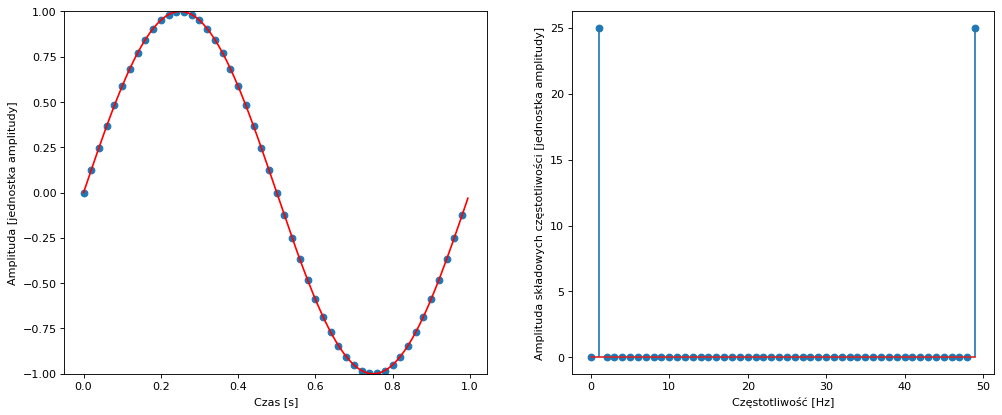

In [9]:
plot_fft(w=50, F=1)

Na wykresach jest 25 punktów dla czestotliwosci 50Hz i T=1s

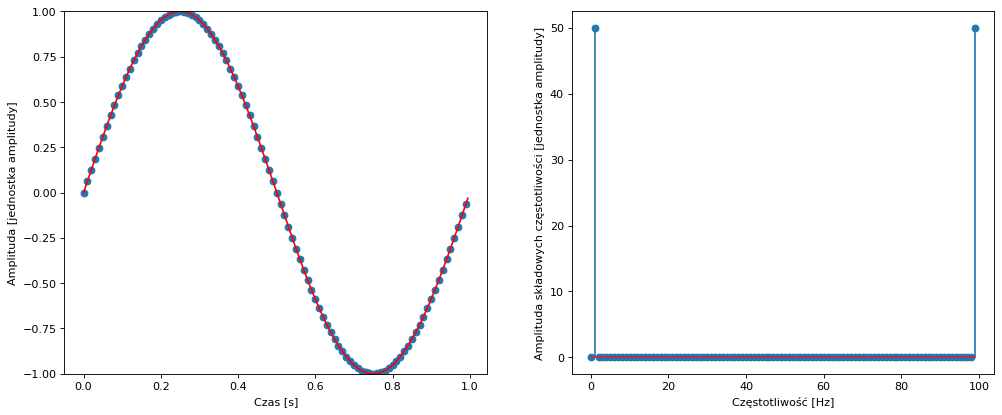

In [10]:
plot_fft(w=100,F=1)

#### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

In [11]:
# chyba git
def plot_fft(w=50, F=2.0, LP=1, A=1):
    #--- Definiujemy sygnal wejsciowy
    #A = 1        # Amplituda sygnalu
    #F = 2.0      # Czestotliwosc sygnalu [Hz]
    T = 1/F      # Okres sygnalu [s]
    f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    #--- Probkujemy sygnal
    #LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
    #w = 40       # Częstotliwość probkowania [Hz]
    TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek

    signal = f(t)   

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    #dodawanie tytułow osi
    plt.setp(ax, xlabel= 'Czas [s]')
    plt.setp(ax, ylabel= 'Amplituda [jednostka amplitudy]')

    #--- Wykonujemy FFT - fast fourier transform czy cos takiego
    signal1 = fft.fft(signal)
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    #ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

    signal1 = signal1 *2 *F /(w*LP)

    freqs = [x/(n*TW) for x in range(n)]
    stem(freqs, signal1, '-*')
    plt.setp(ax, xlabel= 'Częstotliwość [Hz]')
    plt.setp(ax, ylabel= 'Amplituda składowych częstotliwości [jednostka amplitudy]')
    #plt.show()

interact(plot_fft, w=(0,100,1), F=(0,10,0.5), LP=(0,100,5), A=(-3,3,0.5))

interactive(children=(IntSlider(value=50, description='w'), FloatSlider(value=2.0, description='F', max=10.0, …

<function __main__.plot_fft(w=50, F=2.0, LP=1, A=1)>

## Zadanie 2

#### Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Pamiętaj aby przeskalować oś OX na wykresie spektrum. Możesz przyjąć jako rozpatrywany okres rok, wówczas częstotliwość próbkowania będzie wynosiła 12.

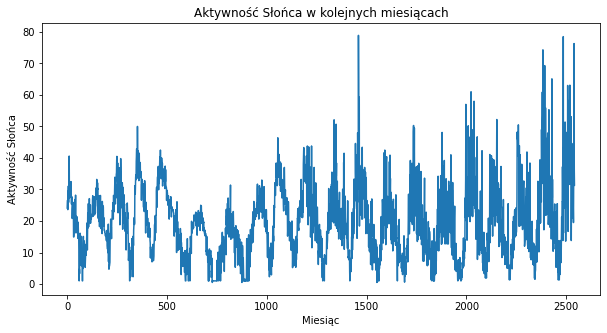

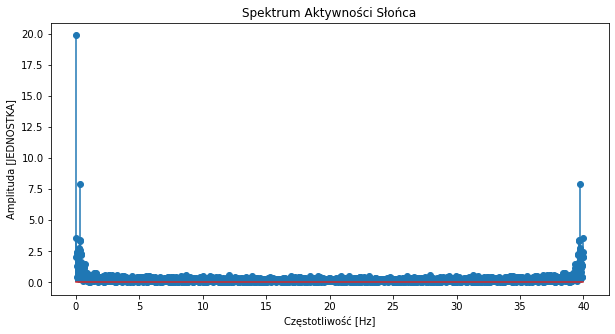

Dominująca częstotliwość (cykle/rok): 7.900363799762435


In [31]:

from pylab import *
from numpy import *
import math
from ipywidgets import *


# Wczytaj dane z pliku "spots.txt":
with open('spots.txt', 'r') as file:
    data = [float(line.strip()) for line in file]

# Wykreśl sygnał:
plt.figure(figsize=(10, 5))
plt.plot(data)
plt.title('Aktywność Słońca w kolejnych miesiącach')
plt.xlabel('Miesiąc')
plt.ylabel('Aktywność Słońca')
plt.show()

#liczy fft
signal1 = abs(fft.fft(data))

#--- Rysuje FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
#ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

plt.figure(figsize=(10, 5))
plt.title('Spektrum Aktywności Słońca')
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Amplituda [JEDNOSTKA]")

#skalowanie ox i oy
signal1 = signal1 * 2 / n
signal1[0]=signal1[0]/2

freqs = [k / (n * TW) for k in range(n)]
stem(freqs, signal1, '-*')

plt.show()
#signal1[0] = 0

# Znajdź dominującą częstotliwość (czyli częstotliwość cyklu aktywności słonecznej):
#dominant_freq = np.argmax(signal1)
dominant_freq = sorted(signal1,reverse=True)[1] #to daje 0.0
print('Dominująca częstotliwość (cykle/rok):', dominant_freq)



## Zadanie 3

#### Proste filtrowanie. Wykreśl sygnał sin(2*pi*t) + sin(4*pi*t), T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

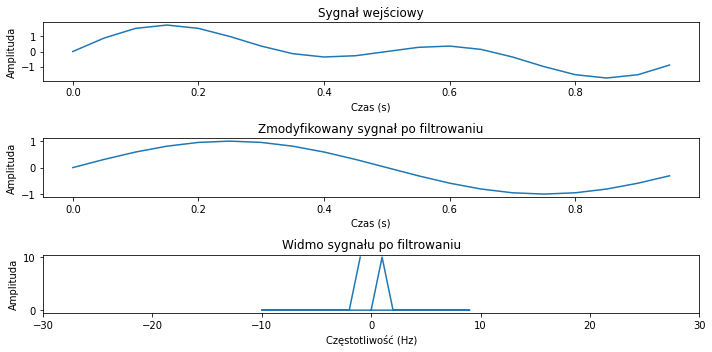

In [13]:
#TU OSTATNI WYKRES NIE ŚMIGANDO

import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
T = 1.0  # Okres sygnału w sekundach
w = 20.0  # Częstotliwość sygnału w hercach

# Tworzenie sygnału
t = np.linspace(0, T, int(T * w), endpoint=False)
signal = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)

# Wykreśl sygnał
plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Sygnał wejściowy')
plt.xlabel('Czas (s)')
plt.ylabel('Amplituda')

# Przekształć sygnał za pomocą FFT
fft_result = np.fft.fft(signal)
freq = np.fft.fftfreq(len(t), d=T/len(t))

# Usuń składowe o częstotliwości 2Hz
fft_result[(freq == 2) | (freq == -2)] = 0

# Przekształć zmodyfikowany sygnał z powrotem do dziedziny czasu
filtered_signal = np.fft.ifft(fft_result)

# Wykreśl zmodyfikowany sygnał
plt.subplot(3, 1, 2)
plt.plot(t, np.real(filtered_signal))
plt.title('Zmodyfikowany sygnał po filtrowaniu')
plt.xlabel('Czas (s)')
plt.ylabel('Amplituda')

# Wykreśl widmo sygnału po filtrowaniu
plt.subplot(3, 1, 3)
plt.plot(freq, np.abs(fft_result))
plt.title('Widmo sygnału po filtrowaniu')
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')
plt.xlim(-30, 30)  # Przeskaluj oś X
plt.tight_layout()
plt.show()


## Zadanie 4

#### Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości.

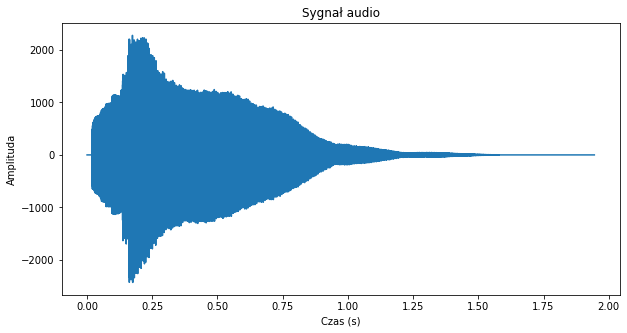

D:\lib\site-packages\matplotlib\axes\_axes.py:7939: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Dominujące częstotliwości:
Próbka 1, Dominująca częstotliwość: 21447.07 Hz
Próbka 2, Dominująca częstotliwość: 21447.07 Hz
Próbka 3, Dominująca częstotliwość: 602.93 Hz
Próbka 4, Dominująca częstotliwość: 602.93 Hz
Próbka 5, Dominująca częstotliwość: 602.93 Hz
Próbka 6, Dominująca częstotliwość: 602.93 Hz
Próbka 7, Dominująca częstotliwość: 21447.07 Hz
Próbka 8, Dominująca częstotliwość: 21576.27 Hz
Próbka 9, Dominująca częstotliwość: 21576.27 Hz
Próbka 10, Dominująca częstotliwość: 21576.27 Hz
Próbka 11, Dominująca częstotliwość: 21576.27 Hz
Próbka 12, Dominująca częstotliwość: 21576.27 Hz
Próbka 13, Dominująca częstotliwość: 473.73 Hz
Próbka 14, Dominująca częstotliwość: 473.73 Hz
Próbka 15, Dominująca częstotliwość: 473.73 Hz
Próbka 16, Dominująca częstotliwość: 473.73 Hz
Próbka 17, Dominująca częstotliwość: 473.73 Hz
Próbka 18, Dominująca częstotliwość: 473.73 Hz
Próbka 19, Dominująca częstotliwość: 473.73 Hz
Próbka 20, Dominująca częstotliwość: 473.73 Hz
Próbka 21, Dominująca częs

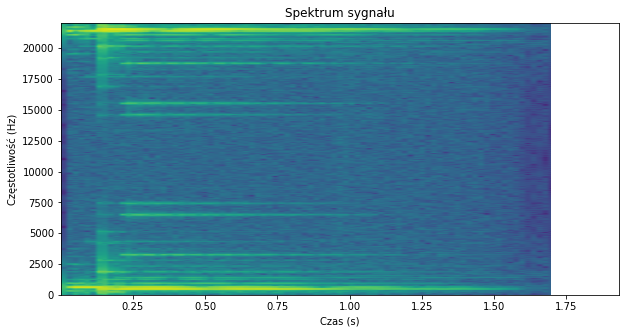

In [14]:
#tu tez raczej nie o to chodzilo

import numpy as np
import matplotlib.pyplot as plt
import wave

# Wczytaj plik "err.wav"
file_path = "err.wav"
with wave.open(file_path, 'rb') as wave_file:
    framerate = wave_file.getframerate()
    frames = wave_file.readframes(-1)
    samples = np.frombuffer(frames, dtype=np.int16)

# Wykreśl sygnał
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(samples)) / framerate, samples)
plt.title('Sygnał audio')
plt.xlabel('Czas (s)')
plt.ylabel('Amplituda')
plt.show()

# Wykreśl spektrum
plt.figure(figsize=(10, 5))
spec = plt.specgram(samples, NFFT=1024, Fs=framerate, cmap='viridis', aspect='auto')
frequencies = spec[1]
times = spec[2]
amplitudes = spec[0]

# Znajdź dominujące częstotliwości
dominant_frequencies = frequencies[np.argmax(amplitudes, axis=0)]

# Wypisz dominujące częstotliwości
print("Dominujące częstotliwości:")
for idx, freq in enumerate(dominant_frequencies):
    print(f"Próbka {idx+1}, Dominująca częstotliwość: {freq:.2f} Hz")

plt.title('Spektrum sygnału')
plt.xlabel('Czas (s)')
plt.ylabel('Częstotliwość (Hz)')
plt.show()
